In [43]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

Data from NYC Open Data Portal : https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh

In [97]:
all_trees = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')

In [98]:
all_trees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468341 entries, 0 to 468340
Data columns (total 41 columns):
FID           468341 non-null int64
tree_id       468341 non-null int64
block_id      468341 non-null int64
created_at    468341 non-null object
tree_dbh      468341 non-null int64
stump_diam    468341 non-null int64
curb_loc      468341 non-null object
status        468341 non-null object
health        468341 non-null object
spc_latin     468341 non-null object
spc_common    468341 non-null object
steward       468341 non-null object
guards        468341 non-null object
sidewalk      468341 non-null object
user_type     468341 non-null object
root_stone    468341 non-null object
root_grate    468341 non-null object
root_other    468341 non-null object
trunk_wire    468341 non-null object
trnk_light    468341 non-null object
trnk_other    468341 non-null object
brch_light    468341 non-null object
brch_shoe     468341 non-null object
brch_other    468341 non-null object
addres

In [53]:
all_trees.head()

,FID,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,0,101233,216486,07/29/2015,4,0,OnCurb,Alive,Good,Quercus bicolor,...,50,18,BK76,Greenpoint,3056300,New York,40.735813,-73.958486,995754.8999,207355.7530
1,1,101234,216486,07/29/2015,4,0,OnCurb,Alive,Good,Quercus bicolor,...,50,18,BK76,Greenpoint,3056300,New York,40.735969,-73.958512,995747.6368,207412.7922
2,2,101235,216486,07/29/2015,4,0,OnCurb,Alive,Good,Quercus bicolor,...,50,18,BK76,Greenpoint,3056300,New York,40.736050,-73.958525,995743.8851,207442.2541
3,3,101400,216291,07/29/2015,15,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,50,18,BK76,Greenpoint,3056300,New York,40.735464,-73.958851,995653.7774,207228.7683
4,4,101401,216291,07/29/2015,18,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,50,18,BK76,Greenpoint,3056300,New York,40.735452,-73.958986,995616.2581,207224.1693


In [72]:
def plot_hist_graph(df, column_name, title):
    plt.hist(df[column_name])
    plt.title(title)
    plt.show()

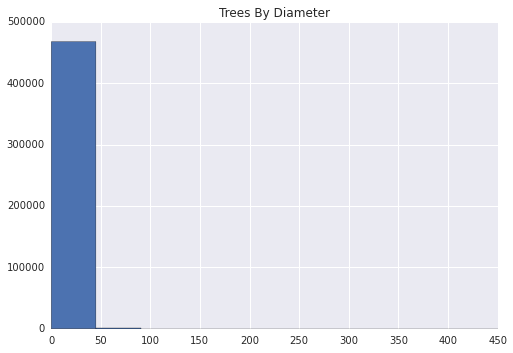

In [73]:
plot_hist_graph(all_trees, 'tree_dbh', 'Trees By Diameter')

LOL WAT?! Those are some big trees!

In [60]:
sorted_by_diameter = df.sort_index(by=['tree_dbh'], ascending=False)

In [61]:
sorted_by_diameter.head()

,FID,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,dist_from_me
360739,360731,433258,507833,11/05/2015,450,0,OffsetFromCurb,Dead,,,...,32,BX09,Soundview-Castle Hill-Clason Point-Harding Park,2001600,New York,40.821953,-73.857671,1023642.9150,238768.6665,14.466631
348292,348289,418433,202962,11/03/2015,318,0,OnCurb,Alive,Good,Platanus x acerifolia,...,18,BK83,Cypress Hills-City Line,3118202,New York,40.688366,-73.869641,1020402.3110,190093.5752,11.730691
398444,398436,476317,602575,11/20/2015,318,0,OnCurb,Alive,Good,Quercus palustris,...,31,MN35,Washington Heights North,1027500,New York,40.850879,-73.943067,1000000.7660,249280.8739,12.980056
340883,340869,409369,410345,10/31/2015,298,0,OnCurb,Alive,Good,Pyrus calleryana,...,24,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5019800,New York,40.518508,-74.212533,925158.4387,128254.7324,30.912862
325744,325738,391542,502971,10/28/2015,291,0,OnCurb,Alive,Fair,Prunus,...,32,BX14,East Concourse-Concourse Village,2014300,New York,40.828114,-73.912674,1008417.4160,240993.5400,11.818198


In [70]:
small_living_trees = all_trees[(all_trees['tree_dbh'] <= 40) & (all_trees['status'] == 'Alive')]

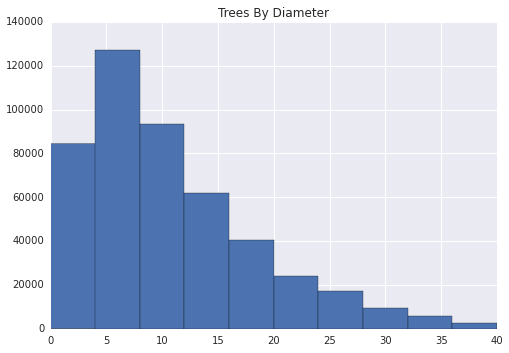

In [74]:
plot_hist_graph(small_trees, 'tree_dbh', 'Trees By Diameter')

In [87]:
def plot_bar_graph(df, column, title):
    df[column].value_counts().plot(kind='bar', title=title)

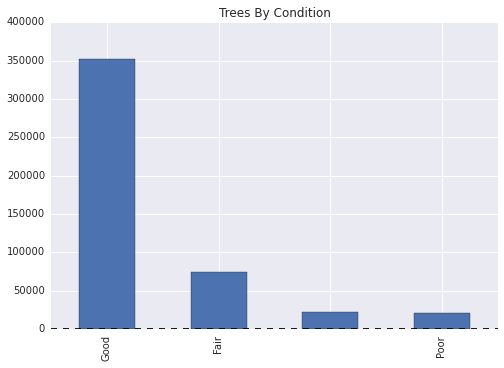

In [89]:
plot_bar_graph(all_trees, 'health', 'Trees By Condition')

The blank status probably indicates that the tree is dead or a stump. There is another field for stump status.

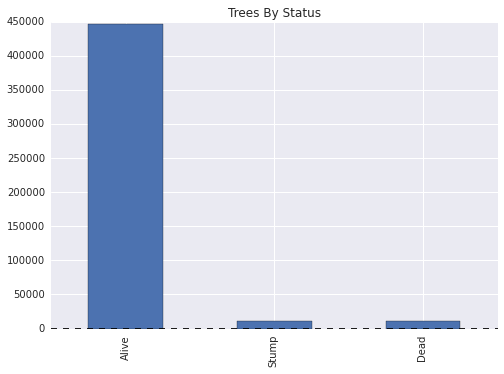

In [93]:
plot_bar_graph(all_trees, 'status', 'Trees By Status')

A steward is a person who cares for a tree. Signs of stewardship include gates, signs, flowers, ivy, pruning etc

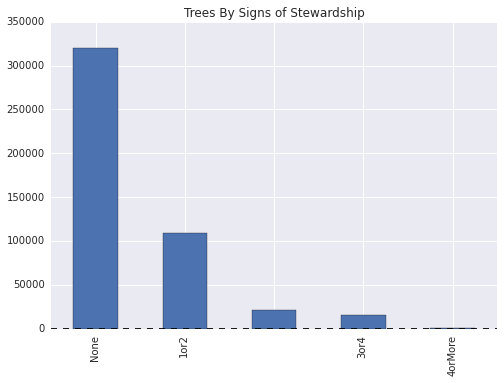

In [96]:
plot_bar_graph(all_trees, 'steward', 'Trees By Signs of Stewardship')

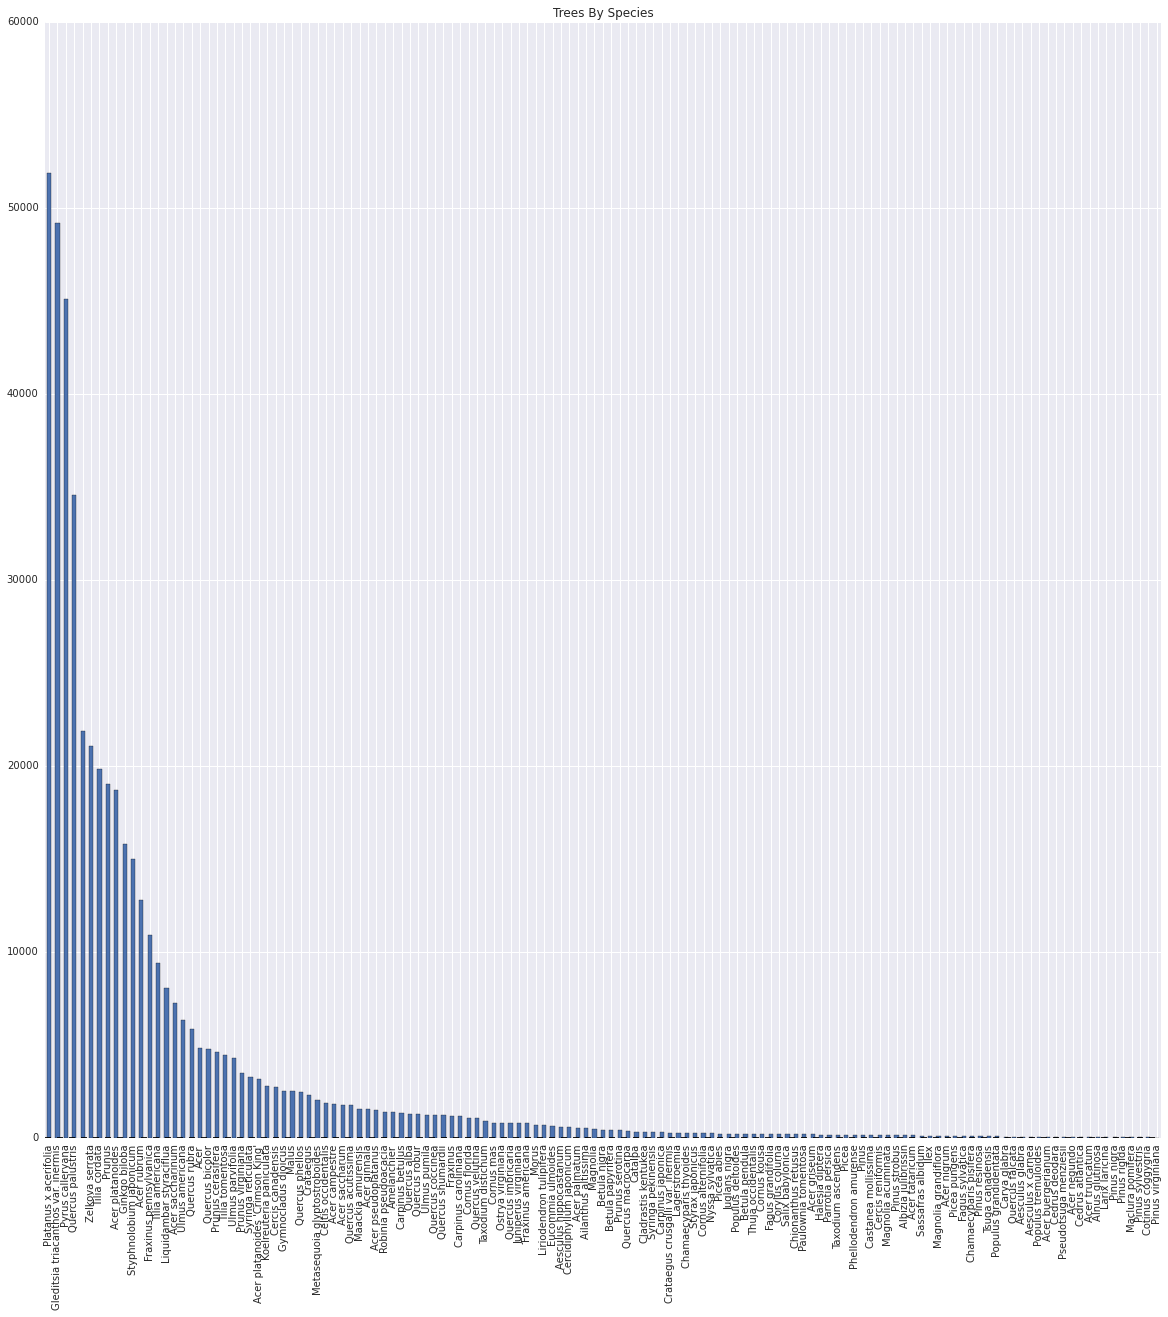

In [95]:
fig = plt.figure(figsize=(20,20)) 
plot_bar_graph(all_trees, 'spc_latin', 'Trees By Species')

In [10]:
import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [ ]:
civic_hall_loc = (40.739944, -73.991055)

In [77]:
all_trees['dist_from_me'] = [distance((row['latitude'], row['longitude']), civic_hall_loc) 
                                 for index, row in all_trees.iterrows()]

In [78]:
sorted_by_distance = all_trees.sort_index(by=['dist_from_me'], ascending=True)

In [79]:
sorted_by_distance.head()

,FID,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,dist_from_me
23778,23766,27827,104256,06/21/2015,4,0,OnCurb,Alive,Good,Prunus virginiana,...,28,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1005200,New York,40.738949,-73.991352,986646.4696,208495.6356,0.113478
23779,23767,27828,104256,06/21/2015,4,0,OnCurb,Alive,Good,Prunus virginiana,...,28,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1005200,New York,40.738892,-73.991391,986635.6612,208475.1070,0.120328
23780,23768,27829,104256,06/21/2015,4,0,OnCurb,Alive,Good,Prunus virginiana,...,28,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1005200,New York,40.738841,-73.991427,986625.8775,208456.5254,0.126549
52666,52634,64479,104316,07/13/2015,4,0,OnCurb,Alive,Good,Styphnolobium japonicum,...,28,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1005800,New York,40.741102,-73.990768,986808.3203,209280.2652,0.131037
26904,26883,31955,104310,06/24/2015,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,28,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1005600,New York,40.740439,-73.989493,987161.7114,209038.8494,0.142690


In [82]:
in_need_near_me = sorted_by_distance[(sorted_by_distance['status'] == 'Alive') & 
                                     (sorted_by_distance['steward'] != 'None') &
                                     (sorted_by_distance['health'] != 'Good')]

In [83]:
in_need_near_me.head()

,FID,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,dist_from_me
373838,373824,448410,104298,11/11/2015,12,0,OnCurb,Alive,Fair,Pyrus calleryana,...,28,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1005600,New York,40.740365,-73.988725,987374.3435,209011.6394,0.201768
26976,26954,32031,104269,06/24/2015,1,0,OnCurb,Alive,Poor,Tilia cordata,...,28,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1005200,New York,40.738854,-73.988870,987334.3600,208461.3079,0.220399
62133,62105,75650,104351,07/18/2015,10,0,OnCurb,Alive,Fair,Platanus x acerifolia,...,28,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1005800,New York,40.742054,-73.990586,986858.5692,209626.9250,0.237884
27015,26992,32069,104267,06/24/2015,4,0,OnCurb,Alive,Fair,Pyrus calleryana,...,28,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1005200,New York,40.739232,-73.988229,987511.9246,208599.0271,0.250898
52727,52695,64545,104337,07/13/2015,4,0,OnCurb,Alive,Poor,Tilia cordata,...,28,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,1005800,New York,40.742294,-73.991601,986577.4130,209714.4563,0.265326


In [84]:
in_need_near_me.to_csv('needy_trees.csv')